In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 0. Simulate dataset

In [93]:
np.random.seed(42)


# (1000, 2) samples from X-U(0, 1)
X = np.random.uniform(0, 1, (1000, 2)) #high, low, samples, features

# 1000 samples E-N(0, 1)
epsilon = np.random.normal(0, 1, size=1000)

# Picking out specific columns from numpy array
X_col1 = X[:, 0]
X_col2 = X[:, 1]

# y-value
y = 3*X_col1 + 5*X_col2 + 3 + epsilon # beta0, beta1, beta2...?
y = y.reshape(-1, 1) # needs to be (1000, 1) in order for shapes to line up correctly in GD function



### Concatinating intercept column for X

In [95]:
intercept = np.ones(len(X)) # create array with ones the length of X
X_1 = np.c_[intercept, X] # concats intercept array with X array
X_1

array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       ...,
       [1.        , 0.75137509, 0.65695516],
       [1.        , 0.95661462, 0.06895802],
       [1.        , 0.05705472, 0.28218707]])

# 1. Gradient descent - learning rate

In [97]:
learning_rate_01 = 0.1
iterations_500 = 500

def gradient_descent(X, y, learning_rate, iterations):
    m = len(X)

    # [beta0, beta1]^T
    theta = np.random.randn(X.shape[1], 1) #blir dimension (3,1) eftersom X ser ut (1000, 3)

    for _ in range(iterations):
        gradient = 2/m*X.T@(X@theta-y) # @ - matrismultiplikation
        theta -= learning_rate*gradient

    return theta

- Värdena som blir utskrinva i denna funktion, ska vara så nära b0 och b1. Det här betyder då att dem "konvergerar"

# A

In [145]:
steps = range(1, 500, 5) # jumping 5 steps per iteration
thetas = [gradient_descent(X_1, y, learning_rate_01, iterations=iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)

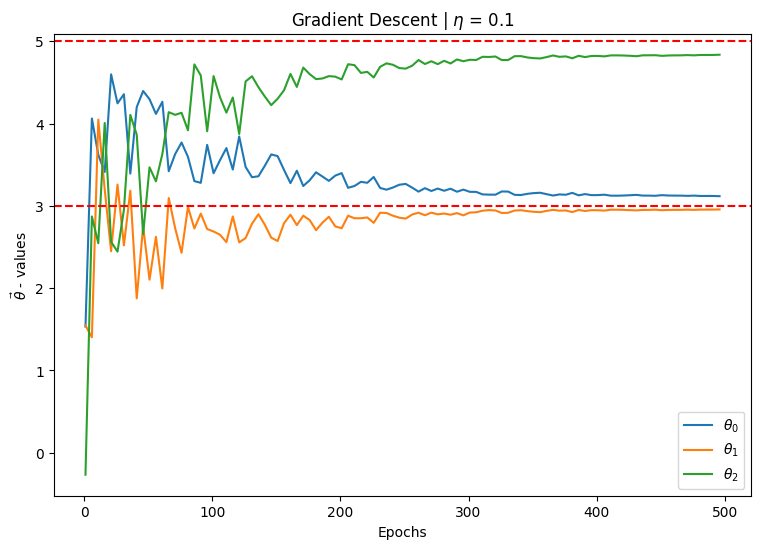

In [146]:
plt.figure(figsize=(9,6))
plt.plot(steps, thetas)
plt.title(r"Gradient Descent | ${\eta}$ = 0.1")
plt.ylabel(r"$\vec{\theta}$ - values")
plt.xlabel("Epochs")
# Beta0 & beta1
plt.axhline(y=3, color='red', linestyle='--')
plt.axhline(y=5, color='red', linestyle='--')
plt.gca().legend((r"${\theta_0}$", r"${\theta_1}$", r"${\theta_2}$")); # legend titlar


# B

In [147]:
learning_rate_001 = 0.01
steps = range(1, 5000, 5) # jumping 5 steps per iteration
thetas = [gradient_descent(X_1, y, learning_rate_001, iterations=iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)

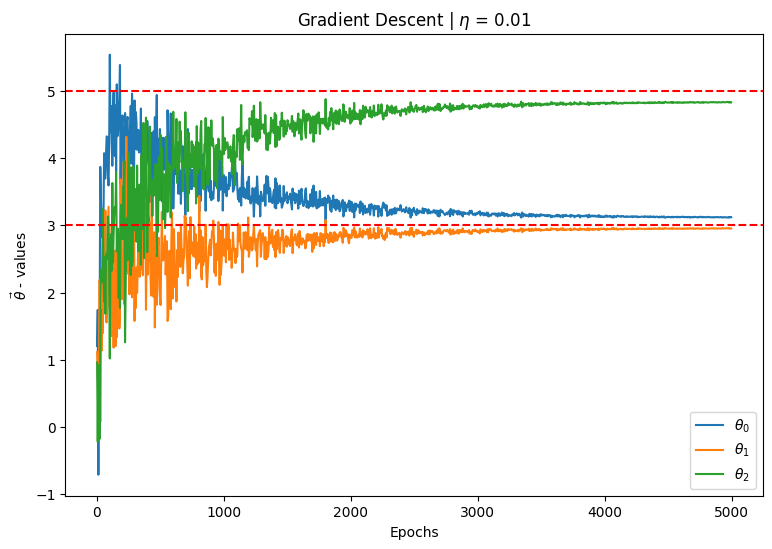

In [148]:
plt.figure(figsize=(9,6))
plt.plot(steps, thetas)
plt.title(r"Gradient Descent | ${\eta}$ = 0.01")
plt.ylabel(r"$\vec{\theta}$ - values")
plt.xlabel("Epochs")
plt.axhline(y=3, color='red', linestyle='--')
plt.axhline(y=5, color='red', linestyle='--')
plt.gca().legend((r"${\theta_0}$", r"${\theta_1}$", r"${\theta_2}$")); # legend titlar

# C

- Balansen måste vara relativ till både antal epoker och learning rate.
- om learning rate är för "lågt" gentemot epoker så blir det bara "squigly lines" som blir bredare och bredare ju lägre learning rate är
- om learning rate är för högt relativt till epokerna så blir det mindre "squigly lines" och rakt streck snabbare
- Vad betyder det här exakt? behöver fråga Kokchun eller kolla upp

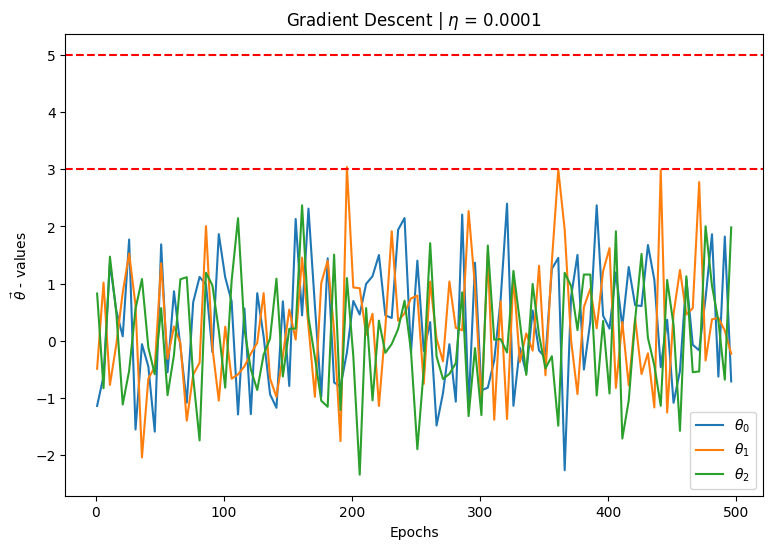

In [149]:
learning_rate_001 = 0.0001
steps = range(1, 500, 5) # jumping 5 steps per iteration
thetas = [gradient_descent(X_1, y, learning_rate_001, iterations=iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)

plt.figure(figsize=(9,6))
plt.plot(steps, thetas)
plt.title(r"Gradient Descent | ${\eta}$ = "f"{learning_rate_001}")
plt.ylabel(r"$\vec{\theta}$ - values")
plt.xlabel("Epochs")
plt.axhline(y=3, color='red', linestyle='--')
plt.axhline(y=5, color='red', linestyle='--')
plt.gca().legend((r"${\theta_0}$", r"${\theta_1}$", r"${\theta_2}$")); # legend titlar

# 2. Stochastic Gradient Descent - learning rate

In [167]:
def SC_gradient_descent(X, y, learning_rate=0.1, epochs=500):

    m = len(X)
    theta = np.random.randn(X.shape[1], 1)

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)

            # random index längden av X som plockar ut en rad från X och y
            # Behöver "+1" annars plockar den inte ut värdena från raden
            x_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]

            #".dot" funkar inte, använd "@"
            gradient = 2 * x_i.T @ (x_i @ (theta) - y_i)
            theta -= learning_rate*gradient

    return theta


- Som man kan se så plockar vi ut en random rad från X och y så många gånger som det finns rader i X.
- Det görs sedan 1 gång för varje epok

In [194]:
random_index = np.random.randint(m)

X_1[23:23+1]

array([[1.        , 0.31171108, 0.52006802]])

- Ända skillnande i funktionen jämfört med vanlig gradient descent är gradient uträkningen och att vi plockar ut 2 random samples från X och y i varje iteration (som förklarar namnet) och använder det i uträkningen för gradient
- Stochastic meaning: having a random probability distribution or pattern that may be analysed statistically but may not be predicted precisely.

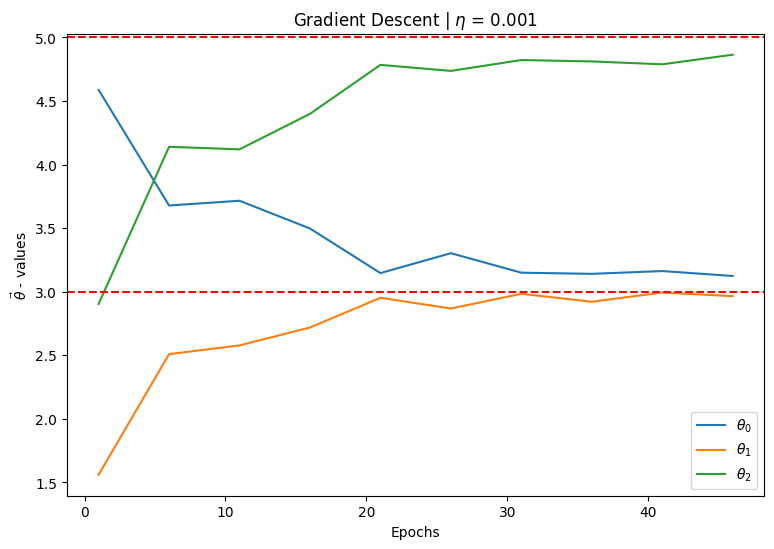

In [150]:
# Need to have lower epoch for stochastic, takes forever if you have 500
learning_rate_001 = 0.001
steps = range(1, 50, 5) # jumping 5 steps per iteration
thetas = [SC_gradient_descent(X_1, y, learning_rate_001, epochs=iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)

plt.figure(figsize=(9,6))
plt.plot(steps, thetas)
plt.title(r"Gradient Descent | ${\eta}$ = "f"{learning_rate_001}")
plt.ylabel(r"$\vec{\theta}$ - values")
plt.xlabel("Epochs")
plt.gca().legend((r"${\theta_0}$", r"${\theta_1}$", r"${\theta_2}$"));

# Beta0 & beta1
plt.axhline(y=3, color='red', linestyle='--', label="True intercept")
plt.axhline(y=5, color='red', linestyle='--', label="True slope")

# with 70 epoch the learning rate sweetspot for close convergance is: 0.001

## Testar Andreas mini-batch kod

In [ ]:
def mini_batch_gradient_descent(X, y, learning_rate = 0.1, epochs = 100, batch_size = 32):
    m = len(X)
    batches = m // batch_size # number of batches per epoch
    theta = np.random.randn(X.shape[1], 1)

    for epoch in range(epochs):

        # Shuffle the training data
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for i in range(batches):
            start_index = i * batch_size
            end_index = start_index + batch_size

            X_batch = X_shuffled[start_index : end_index]
            y_batch = y_shuffled[start_index : end_index]

            gradient = 2 / m * X_batch.T @ (X_batch @ theta - y_batch)

            theta -= learning_rate * gradient
    
    return theta

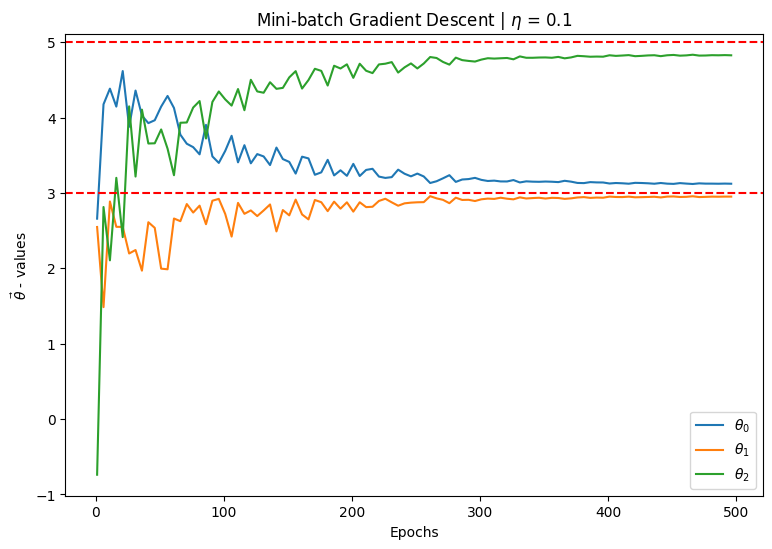

In [151]:
learning_rate_001 = 0.1
steps = range(1, 500, 5) # jumping 5 steps per iteration
thetas = [mini_batch_gradient_descent(X_1, y, learning_rate_001, epochs=iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)

plt.figure(figsize=(9,6))
plt.plot(steps, thetas)
plt.title(r"Mini-batch Gradient Descent | ${\eta}$ = "f"{learning_rate_001}")
plt.ylabel(r"$\vec{\theta}$ - values")
plt.xlabel("Epochs");
plt.axhline(y=3, color='red', linestyle='--')
plt.axhline(y=5, color='red', linestyle='--')
plt.gca().legend((r"${\theta_0}$", r"${\theta_1}$", r"${\theta_2}$"));

## mini-batch 